### Article: https://www.anthropic.com/research/building-effective-agents

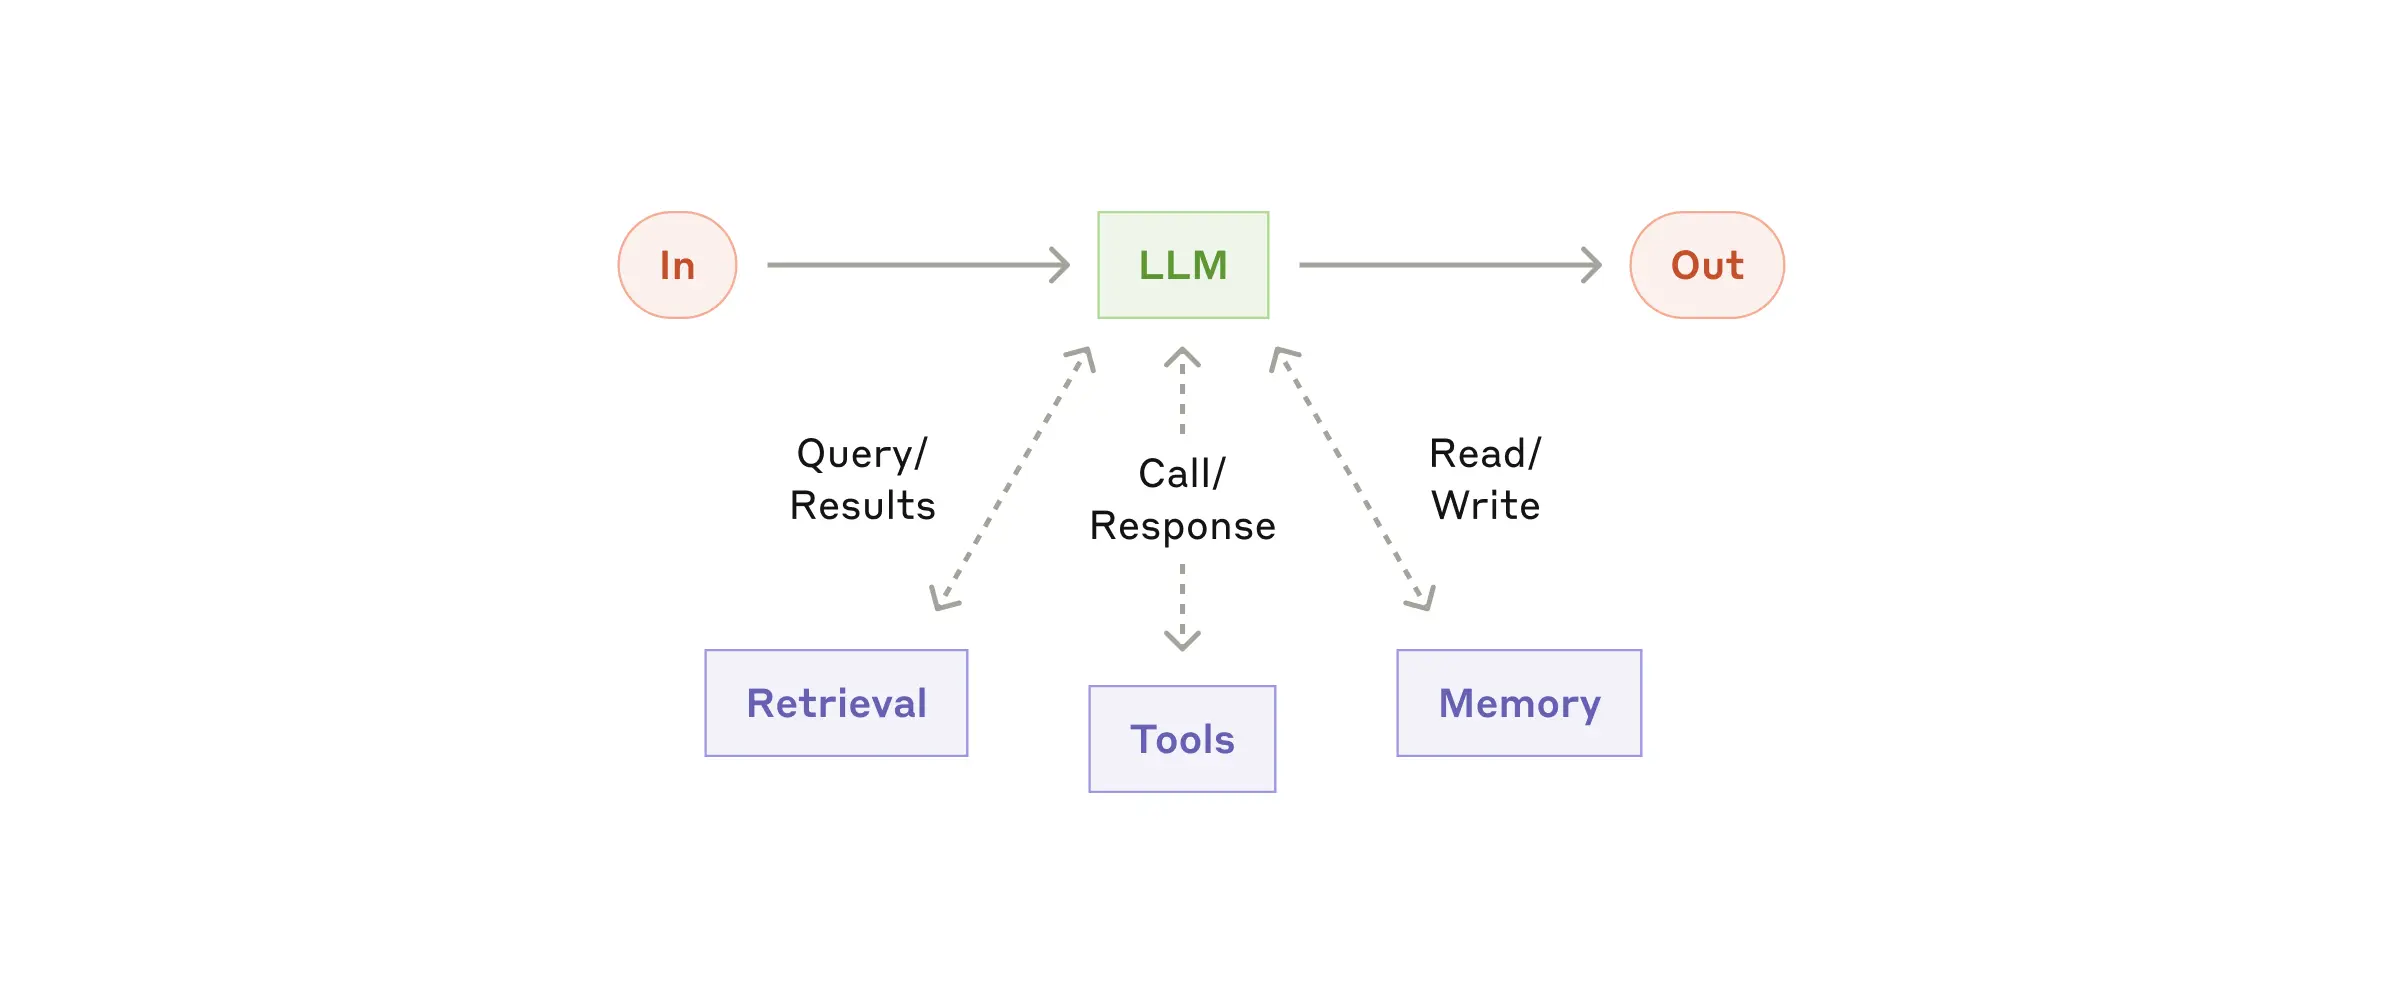

In [5]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Enter {var}: ")
    else:
        print(f"{var} already set")
        
_set_env("OPENAI_API_KEY")

OPENAI_API_KEY already set


In [9]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

## Core Building Blocks: Augmenting LLM

### Generating own search query

In [14]:
from pydantic import BaseModel, Field

class SearchQuery(BaseModel):
    search_query: str = Field(None, title="Search Query", description="Query that is optimized for search engines")
    justification: str = Field(None, title="Justification", description="Why this query is relevant for the user's request")
    
structured_llm = llm.with_structured_output(SearchQuery)

output = structured_llm.invoke("What is the capital of France?")
print(output.search_query)
print(output.justification)

capital of France
This query is simple and directly answers the user's question about the capital city of France, which is Paris.


### Tool Calling Example


In [15]:
def multiply(a: int, b: int):
    return a * b

llm_with_tools = llm.bind_tools([multiply])

msg = llm_with_tools.invoke("What is 3 times 4?")

msg.tool_calls

[{'name': 'multiply',
  'args': {'a': 3, 'b': 4},
  'id': 'call_rExQljwZoHXnpFGB64LnscWe',
  'type': 'tool_call'}]